In [14]:
# !pip install pydicom
import pydicom
import matplotlib.pyplot as plt
import numpy as np
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

In [15]:
window_center = -600
window_width = 1600

In [16]:
# DICOM 파일 읽는 함수 -> pydicom.read_file(), pydicom.dcmread()
slice = pydicom.read_file("./ID_0000_AGE_0060_CONTRAST_1_CT.dcm")
# print(slice)


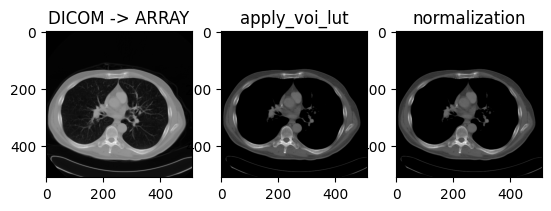

In [20]:
s = int(slice.RescaleSlope)
b = int(slice.RescaleIntercept)
image = s * slice.pixel_array + b

# Array
plt.subplot(1,3,1)
plt.title("DICOM -> ARRAY")
plt.imshow(image, cmap = 'gray')

# lut
slice.WindowCenter = window_center
slice.WindowWidth = window_width
image = apply_modality_lut(image, slice)
image2 = apply_voi_lut(image, slice)
plt.subplot(1,3,2)
plt.title("apply_voi_lut")
plt.imshow(image2, cmap = 'gray')

# normalization
image3 = np.clip(image, window_center - (window_width/2), window_center+(window_width/2))
plt.subplot(1,3,3)
plt.title("normalization")
plt.imshow(image3, cmap = 'gray')
plt.show()